In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json

sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [2]:
# Load Data
stat_records_fname = "../../../AirSimCollectData/LidarRoofManualTest/stat_records.json"
with open(stat_records_fname) as f:
    stat_records = json.load(f)
df_desktop = pd.DataFrame.from_dict(stat_records)

stat_records_fname = "../../../AirSimCollectData/LidarRoofManualTest/stat_records_tx2.json"
with open(stat_records_fname) as f:
    stat_records = json.load(f)

df_tx2 = pd.DataFrame.from_dict(stat_records)

stat_records_fname = "../../../AirSimCollectData/LidarRoofManualTest/fcn8s_mobilenet_stats_tx2.json"
with open(stat_records_fname) as f:
    stat_records = json.load(f)

stat_records = stat_records[1:]
df_tx2_gpu = pd.DataFrame.from_dict(stat_records)

stat_records_fname = "../../../AirSimCollectData/LidarRoofManualTest/fcn8s_mobilenet_stats_desktop.json"
with open(stat_records_fname) as f:
    stat_records = json.load(f)

stat_records = stat_records[1:]
df_desktop_gpu = pd.DataFrame.from_dict(stat_records)

df_combined = pd.concat([df_desktop, df_tx2])

df_combined = pd.concat([df_desktop, df_tx2, df_tx2_gpu, df_desktop_gpu ])

In [5]:
df_combined

building                command environment metric  \
0            Building7_Example4  classify_point_clouds     desktop   None   
1            Building7_Example4  classify_point_clouds     desktop   None   
2            Building7_Example4  classify_point_clouds     desktop   None   
3            Building7_Example4  classify_point_clouds     desktop   None   
4            Building7_Example5  classify_point_clouds     desktop   None   
5            Building7_Example5  classify_point_clouds     desktop   None   
6            Building7_Example5  classify_point_clouds     desktop   None   
7            Building7_Example5  classify_point_clouds     desktop   None   
8    Building1_Example_Enhanced  classify_point_clouds     desktop   None   
9    Building1_Example_Enhanced  classify_point_clouds     desktop   None   
10   Building1_Example_Enhanced  classify_point_clouds     desktop   None   
11   Building1_Example_Enhanced  classify_point_clouds     desktop   None   
12            Building1_Example  classify_point_clouds     desktop   None   
13            Building1_Example  classify_point_clouds     desktop   None   
14            Building1_Example  classify_point_clouds     desktop   None   
15            Building1_Example  classify_point_clouds     desktop   None   
16            Building5_Example  classify_point_clouds     desktop   None   
17            Building5_Example  classify_point_clouds     desktop   None   
18            Building5_Example  classify_point_clouds     desktop   None   
19            Building5_Example  classify_point_clouds     desktop   None   
20            Building2_Example  classify_point_clouds     desktop   None   
21            Building2_Example  classify_point_clouds     desktop   None   
22            Building2_Example  classify_point_clouds     desktop   None   
23           Building7_Example2  classify_point_clouds     desktop   None   
24           Building7_Example2  classify_point_clouds     desktop   None   
25           Building7_Example2  classify_point_clouds     desktop   None   
26           Building7_Example2  classify_point_clouds     desktop   None   
27          Building_6_01_multi  classify_point_clouds     desktop   None   
28          Building_6_01_multi  classify_point_clouds     desktop   None   
29          Building_6_01_multi  classify_point_clouds     desktop   None   
..                          ...                    ...         ...    ...   
231                        None   predict_segmentation     RTX2080   None   
232                        None   predict_segmentation     RTX2080   None   
233                        None   predict_segmentation     RTX2080   None   
234                        None   predict_segmentation     RTX2080   None   
235                        None   predict_segmentation     RTX2080   None   
236                        None   predict_segmentation     RTX2080   None   
237                        None   predict_segmentation     RTX2080   None   
238                        None   predict_segmentation     RTX2080   None   
239                        None   predict_segmentation     RTX2080   None   
240                        None   predict_segmentation     RTX2080   None   
241                        None   predict_segmentation     RTX2080   None   
242                        None   predict_segmentation     RTX2080   None   
243                        None   predict_segmentation     RTX2080   None   
244                        None   predict_segmentation     RTX2080   None   
245                        None   predict_segmentation     RTX2080   None   
246                        None   predict_segmentation     RTX2080   None   
247                        None   predict_segmentation     RTX2080   None   
248                        None   predict_segmentation     RTX2080   None   
249                        None   predict_segmentation     RTX2080   None   
250                        None   predict_segmentation     RTX2080   None   
251                

In [10]:
df_desktop[df_desktop.command == 'classify_point_clouds']['misc'].mean()

1467.2213740458014

In [4]:
# g = sns.swarmplot(x="command", y="time", hue="environment",
#               data=df_combined)
# g.set_ylim(0, 80)

C:\Users\Jerem\Anaconda3\envs\airsimcollect\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


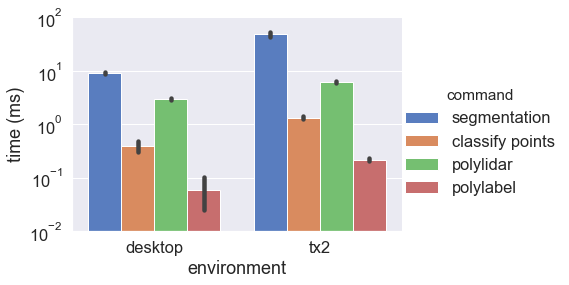

In [3]:
# Clean text if needed
df_combined.loc[df_combined['command'] == 'classify_point_clouds', 'command'] = "classify points"
df_combined.loc[df_combined['command'] == 'predict_segmentation', 'command'] = "segmentation"
df_combined.loc[df_combined['environment'] == 'laptop', 'environment'] = "desktop"
df_combined.loc[df_combined['environment'] == 'RTX2080', 'environment'] = "desktop"

g = sns.catplot(x="environment", y="time", hue="command", data=df_combined, kind="bar", palette="muted", 
                hue_order=["segmentation", "classify points", "polylidar", "polylabel"], facet_kws=dict(ylim=[0.01, 100]), height=4, aspect=1.5)

g.set_ylabels("time (ms)")
g.set(yscale="log")
g.savefig("imgs/timing_results.pdf")

In [6]:
def stacked_bar_chart(pivoted_df, stack_vals, level_values_field, chart_title, x_label, y_label, filename, color1, color2):
    #
    # stacked_bar_chart: draws and saves a barchart figure to filename
    #
    # pivoted_df: dataframe which has been pivoted so columns correspond to the values to be plotted
    # stack_vals: the column names in pivoted_df to plot
    # level_values_field: column in the dataframe which has the values to be plotted along the x axis (typically time dimension)
    # chart_title: how to title chart
    # x_label: label for x axis
    # y_label: label for y axis
    # filename: full path filename to save file
    # color1: first color in spectrum for stacked bars
    # color2: last color in spectrum for stacked bars; routine will select colors from color1 to color2 evenly spaced
    #
    # Implementation: based on (http://randyzwitch.com/creating-stacked-bar-chart-seaborn/; https://gist.github.com/randyzwitch/b71d47e0d380a1a6bef9)
    # this routine draws overlapping rectangles, starting with a full bar reaching the highest point (sum of all values), and then the next shorter bar
    # and so on until the last bar is drawn.  These are drawn largest to smallest with overlap so the visual effect is that the last drawn bar is the
    # bottom of the stack and in effect the smallest rectangle drawn.
    #
    # Here "largest" and "smallest" refer to relationship to foreground, with largest in the back (and tallest) and smallest in front (and shortest).
    # This says nothing about which part of the bar appear large or small after overlap.
    #
    color_spectrum = list(color1.range_to(color2, len(stack_vals)))
    plt.clf()
    #
    stack_total_column = 'Stack_subtotal_xyz'  # placeholder name which should not exist in pivoted_df
    bar_num = 0
    legend_rectangles = []
    legend_names = []
    for bar_part in stack_vals:    # for every item in the stack we need to compute a rectangle
        stack_color = color_spectrum[bar_num].get_hex_l()  # get_hex_l ensures full hex code of color
        sub_count = 0
        pivoted_df[stack_total_column] = 0
        stack_value = ""
        for stack_value in stack_vals:  # for every item in the stack we create a new subset [stack_total_column] of 1 to N of the sub values
            pivoted_df[stack_total_column] += pivoted_df[stack_value]  # sum up total
            sub_count += 1
            if sub_count >= len(stack_vals) - bar_num:  # we skip out after a certain number of stack values
                break
        # now we have set the subtotal and can plot the bar.  reminder: each bar is overalpped by smaller subsequent bars starting from y=0 axis
        bar_plot = sns.barplot(data=pivoted_df, x=pivoted_df.index.get_level_values(level_values_field),
                           y=stack_total_column, color=stack_color)
        legend_rectangles.append(plt.Rectangle((0,0),1,1,fc=stack_color, edgecolor = 'none'))  
        legend_names.append(stack_value)   # the "last" stack_value is the name of that part of the stack
        bar_num += 1
    l = plt.legend(legend_rectangles, legend_names, loc=2, ncol = 1, prop={'size':12})
    l.draw_frame(False)
    bar_plot.set(xlabel=x_label, ylabel=y_label)
    plt.tight_layout()
    plt.title(chart_title)
    sns.despine(left=True)
    plt.savefig(filename)